# I. MySQL에서 데이터 로드

In [3]:
#pip install pymysql

In [4]:
#pip install seaborn

In [1]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import config 
from config import DB_CONFIG
import pymysql  
 
# MySQL 연결
conn = pymysql.connect(
     host=DB_CONFIG['host'],
     user=DB_CONFIG['user'],
     password=DB_CONFIG['password'],
     database=DB_CONFIG['database'],
     port=DB_CONFIG['port']
 )
 
car_siren = f"SELECT * FROM merge50_car_siren"
car_horn = f"SELECT * FROM merge50_car_horn"
car_driving = f'SELECT * FROM merge50_car_driving'
motorcycle_horn  = f'SELECT * FROM merge50_motorcycle_horn'
motorcycle_driving  = f'SELECT * FROM merge50_motorcycle_driving'
 
car_siren_df =  pd.read_sql(car_siren, conn)
car_horn_df = pd.read_sql(car_horn, conn) 
car_driving_df = pd.read_sql(car_driving, conn) 
motorcycle_horn_df= pd.read_sql(motorcycle_horn, conn) 
motorcycle_driving_df = pd.read_sql(motorcycle_driving, conn) 
 
conn.close()

/tmp/ipykernel_27115/30002709.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_siren_df =  pd.read_sql(car_siren, conn)
/tmp/ipykernel_27115/30002709.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_horn_df = pd.read_sql(car_horn, conn)
/tmp/ipykernel_27115/30002709.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_driving_df = pd.read_sql(car_driving, conn)
/tmp/ipykernel_27115/30002709.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlit

# II. EDA 및 전처리

In [3]:
print(f'car_siren 데이터 개수: {car_siren_df.shape[0]}')
print(f'car_horn 데이터 개수: {car_horn_df.shape[0]}')
print(f'car_driving 데이터 개수: {car_driving_df.shape[0]}')
print(f'motorcycle_horn 데이터 개수: {motorcycle_horn_df.shape[0]}')
print(f'motorcycle_driving 데이터 개수: {motorcycle_driving_df.shape[0]}')

car_siren 데이터 개수: 1990
car_horn 데이터 개수: 3189
car_driving 데이터 개수: 1682
motorcycle_horn 데이터 개수: 4560
motorcycle_driving 데이터 개수: 4735


In [4]:
car_horn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fileName       3189 non-null   object 
 1   labelName      3189 non-null   object 
 2   area_start     3189 non-null   float64
 3   area_end       3189 non-null   float64
 4   category_01    3189 non-null   object 
 5   category_02    3189 non-null   object 
 6   category_03    3189 non-null   object 
 7   decibel        3189 non-null   int64  
 8   soundQuality   3189 non-null   object 
 9   subCategory    3189 non-null   object 
 10  bitRate        3189 non-null   object 
 11  duration       3189 non-null   float64
 12  fileFormat     3189 non-null   object 
 13  fileSize       3189 non-null   int64  
 14  recodingType   3189 non-null   object 
 15  sampleRate     3189 non-null   object 
 16  acqDevice      3189 non-null   object 
 17  acqMethod      3189 non-null   object 
 18  acqType 

In [5]:
car_horn_df.head()

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,1.car_horn_87900_1.wav,1.car_horn_87900_1.wav,2.0,58.719,교통소음,자동차,차량경적,116,정상,소형차경적,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,1.car_horn_87964_1.wav,1.car_horn_87964_1.wav,2.0,59.747,교통소음,자동차,차량경적,102,정상,소형차경적,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,1.car_horn_87987_1.wav,1.car_horn_87987_1.wav,2.0,59.217,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,1.car_horn_88000_1.wav,1.car_horn_88000_1.wav,2.0,57.389,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,1.car_horn_88001_1.wav,1.car_horn_88001_1.wav,2.0,58.207,교통소음,자동차,차량경적,122,정상,소형차경적,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427


In [6]:
car_horn_df.iloc[ : ,-50:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,-391.00430,107.641975,64.204640,33.718952,20.630340,13.337987,9.100019,8.873220,9.340549,8.287990,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,-233.66284,87.917620,45.434906,19.435001,9.098841,32.400368,5.817845,9.204194,14.611247,20.294502,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,-318.16153,126.123180,43.729805,-11.429483,-5.223235,13.667998,0.934844,10.497743,2.401143,22.281258,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,-385.20926,140.265410,57.263832,-7.932145,-3.877982,14.155136,6.298158,11.397833,2.566783,15.076704,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,-382.12450,150.004900,61.439040,-17.890905,-7.740589,15.947204,3.806582,7.909450,2.633213,14.426663,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-99.19382,119.270660,-76.342830,14.679804,-26.403290,5.220899,-15.944427,-0.425459,-14.378425,-2.452169,...,1.322109,-1.603073,-0.969422,-0.030491,-3.283236,-4.058084,-2.597992,-0.028827,1.399276,-4.661576
3185,-292.45557,203.069000,-53.426810,37.105576,6.516268,10.316400,11.667080,1.168588,17.977980,5.434537,...,0.412159,-0.795219,-1.426503,-3.167590,-2.035457,0.571453,4.668703,3.238892,-5.142219,-4.995093
3186,-198.79451,201.686460,-87.792480,-11.408583,-14.657739,-5.088332,-0.388612,-13.570362,6.362044,-11.089597,...,-1.205375,0.633744,2.143693,-4.530044,-7.654323,3.844430,9.282047,2.180258,-6.707889,-3.188458
3187,-247.43971,186.716000,-45.675808,47.491760,18.612213,16.028240,8.016017,3.121070,13.013415,4.386095,...,0.659112,-2.346271,-1.647404,-0.503469,0.055166,-0.353136,-0.114590,1.304396,0.613524,-0.592904


In [7]:
#데이터프레임 병합 
df_combined = pd.concat([car_horn_df, car_siren_df,car_driving_df,motorcycle_horn_df,motorcycle_driving_df], ignore_index=True)

print(f'df_combined 행 개수: {len(df_combined)}') 
df_combined.head()

df_combined 행 개수: 16156


,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,1.car_horn_87900_1.wav,1.car_horn_87900_1.wav,2.0,58.719,교통소음,자동차,차량경적,116,정상,소형차경적,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,1.car_horn_87964_1.wav,1.car_horn_87964_1.wav,2.0,59.747,교통소음,자동차,차량경적,102,정상,소형차경적,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,1.car_horn_87987_1.wav,1.car_horn_87987_1.wav,2.0,59.217,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,1.car_horn_88000_1.wav,1.car_horn_88000_1.wav,2.0,57.389,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,1.car_horn_88001_1.wav,1.car_horn_88001_1.wav,2.0,58.207,교통소음,자동차,차량경적,122,정상,소형차경적,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427


In [8]:
df_combined.iloc[ : ,-50:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,-391.00430,107.641975,64.204640,33.718952,20.630340,13.337987,9.100019,8.873220,9.340549,8.287990,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,-233.66284,87.917620,45.434906,19.435001,9.098841,32.400368,5.817845,9.204194,14.611247,20.294502,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,-318.16153,126.123180,43.729805,-11.429483,-5.223235,13.667998,0.934844,10.497743,2.401143,22.281258,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,-385.20926,140.265410,57.263832,-7.932145,-3.877982,14.155136,6.298158,11.397833,2.566783,15.076704,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,-382.12450,150.004900,61.439040,-17.890905,-7.740589,15.947204,3.806582,7.909450,2.633213,14.426663,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16151,-134.79400,167.532800,7.216292,15.758182,18.004358,3.681938,0.359724,0.995183,-16.901344,-5.779024,...,0.148856,2.617479,-0.394380,0.228787,-0.813453,-1.134764,-0.864591,1.662077,-0.654128,0.215723
16152,-214.37556,137.193790,-15.827540,37.033820,-14.496526,32.809563,-7.713640,2.952441,1.501028,0.895649,...,-1.110981,-0.138743,-0.092305,-1.805980,-0.590370,-0.420101,0.680311,-0.311218,-0.129329,-1.615104
16153,-152.88358,141.889480,-68.941160,7.881523,-29.909588,-7.438705,-22.051588,-8.616838,-16.056900,-6.231401,...,-3.755298,-2.622874,-2.315738,-3.121662,-4.175147,-4.395317,-3.526200,-4.390431,-3.562070,-4.967227
16154,-150.00578,138.438980,-60.815014,26.880222,-13.217022,4.150313,-13.740492,-1.927542,-17.932528,-3.447675,...,-2.461309,-0.614726,-2.006001,-1.224681,-1.578365,-1.270139,-1.381948,-0.736268,0.244385,0.520519


# III. 기본 ResNet 모델링

In [10]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

2025-02-27 16:15:09.956066: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-27 16:15:10.004800: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 16:15:10.824584: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


2025-02-27 16:15:11.431793: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-27 16:15:11.442022: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-27 16:15:11.443578: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
tf.config.set_visible_devices([], 'GPU')

2025-02-27 16:15:19.118436: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-27 16:15:19.120269: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-27 16:15:19.121766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [12]:
!nvidia-smi

Thu Feb 27 16:15:21 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   32C    P0    24W /  70W |    564MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. 데이터 전처리

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터프레임 로드 (예시)
# df_combined = pd.read_csv('your_data.csv')  # 실제 데이터 파일 경로로 변경

# MFCC 특징 사용
X = df_combined.iloc[:, -50:]  # mfcc_1부터 mfcc_50까지 사용
y = df_combined['category_03']  # 레이블 컬럼
y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 변환 (ResNet 입력 형태)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encoding
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [14]:
import librosa
import random
import numpy as np

#데이터 증강 함수
def augment_audio(audio, sr, shift_range=0.2, pitch_range=3, noise_level=0.02, time_stretch_range=0.1):
    shift = int(np.random.uniform(low=-shift_range, high=shift_range) * len(audio))
    audio_shifted = np.roll(audio, shift)
    pitch_factor = np.random.uniform(low=-pitch_range, high=pitch_range)
    audio_pitched = librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_factor)
    noise = np.random.normal(0, noise_level, len(audio))
    audio_noisy = audio + noise
    time_stretch_factor = np.random.uniform(low=1-time_stretch_range, high=1+time_stretch_range)
    audio_time_stretched = librosa.effects.time_stretch(audio, rate=time_stretch_factor)
    if len(audio_time_stretched) < len(audio):
        audio_time_stretched = np.pad(audio_time_stretched, (0, len(audio) - len(audio_time_stretched)), 'constant')
    else:
        audio_time_stretched = audio_time_stretched[:len(audio)]
    return audio_shifted, audio_pitched, audio_noisy, audio_time_stretched

# 데이터 증강 적용
X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    audio = X_train[i].flatten()
    label = y_train[i]

    if np.argmax(label) == 4:
        for _ in range(7): # 클래스 4는 7배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif np.argmax(label) == 1:
        for _ in range(5): # 클래스 1은 5배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif np.argmax(label) == 2:
        for _ in range(3): # 클래스 2는 3배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1, 1)])
            y_train_augmented.extend([label, label, label, label])

    X_train_augmented.append(audio.reshape(-1, 1))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 데이터 형태 변환 (ResNet 입력 형태)
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

/home/lab06/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=50
  return f(*args, **kwargs)
/home/lab06/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=50
  return f(*args, **kwargs)


## 2. ResNet 모델 정의

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GlobalAveragePooling1D, Dense, BatchNormalization, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight

# ResNet 모델 구축
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 512, stride=2)
    x = GlobalAveragePooling1D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

# 모델 생성 및 컴파일
resnet_model = build_resnet(X_train.shape[1:], num_classes=num_classes)
optimizer = Adam(learning_rate=0.001)
resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## 3. 모델 학습

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight

In [21]:
# 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_augmented, axis=1)), y=np.argmax(y_train_augmented, axis=1))
class_weights_dict = dict(enumerate(class_weights))

history = resnet_model.fit(X_train_augmented, y_train_augmented, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr], class_weight=class_weights_dict)

Epoch 1/100


2025-02-27 16:20:02.841137: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f292c14ffa0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-02-27 16:20:02.841182: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-02-27 16:20:02.939041: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-27 16:20:03.230151: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4942/4942 [==============================] - 146s 29ms/step - loss: 0.3257 - accuracy: 0.8445 - val_loss: 0.4370 - val_accuracy: 0.8589 - lr: 0.0010
Epoch 2/100
4942/4942 [==============================] - 142s 29ms/step - loss: 0.2031 - accuracy: 0.9014 - val_loss: 0.3222 - val_accuracy: 0.9004 - lr: 0.0010
Epoch 3/100
4942/4942 [==============================] - 145s 29ms/step - loss: 0.1604 - accuracy: 0.9216 - val_loss: 0.4112 - val_accuracy: 0.8592 - lr: 0.0010
Epoch 4/100
4942/4942 [==============================] - 141s 29ms/step - loss: 0.1362 - accuracy: 0.9329 - val_loss: 0.1490 - val_accuracy: 0.9446 - lr: 0.0010
Epoch 5/100
4942/4942 [==============================] - 141s 29ms/step - loss: 0.1205 - accuracy: 0.9417 - val_loss: 0.1436 - val_accuracy: 0.9499 - lr: 0.0010
Epoch 6/100
4942/4942 [==============================] - 141s 29ms/step - loss: 0.1003 - accuracy: 0.9504 - val_loss: 0.1505 - val_accuracy: 0.9548 - lr: 0.0010
Epoch 7/100
4942/4942 [=======================

## 4. 모델 평가

101/101 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       949
           1       0.95      0.96      0.95       915
           2       0.93      0.95      0.94       621
           3       0.96      0.96      0.96       422
           4       0.88      0.90      0.89       325

    accuracy                           0.95      3232
   macro avg       0.94      0.94      0.94      3232
weighted avg       0.95      0.95      0.95      3232

[[906   2  40   1   0]
 [  1 874   2   6  32]
 [ 18   4 593   5   1]
 [  0   8   3 406   5]
 [  0  30   1   3 291]]


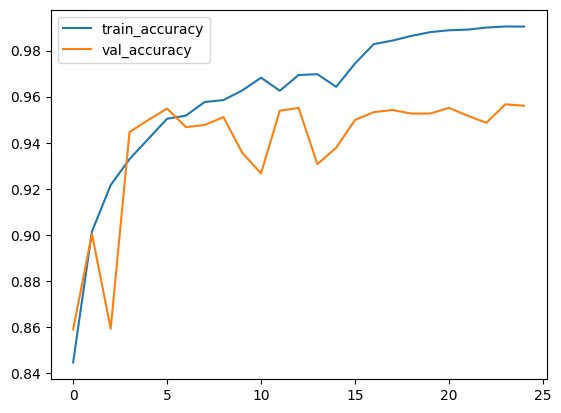

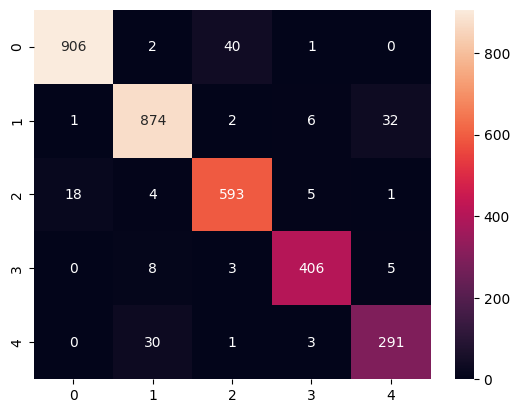

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 평가
y_pred = resnet_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels))
print(confusion_matrix(y_true_labels, y_pred_labels))

# 시각화
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

sns.heatmap(confusion_matrix(y_true_labels, y_pred_labels), annot=True, fmt='d')
plt.show()

## 5. OOD 탐지 함수 추가 및 최종 평가

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

# 5. OOD 데이터 준비 및 전처리
df_ood = pd.read_csv('df_combined_ect_20.csv')
X_ood = df_ood.iloc[:, -50:]  # MFCC 특징 사용
X_ood = X_ood.values.reshape((X_ood.shape[0], X_ood.shape[1], 1))

# 6. OOD 데이터 예측
y_pred_ood = resnet_model.predict(X_ood)

# 7. OOD 점수 계산 (Softmax 최대 확률)
ood_scores = np.max(y_pred_ood, axis=1)

# 8. OOD 탐지 성능 평가 (ROC AUC)
y_true_ood = np.concatenate([np.ones(len(X_test)), np.zeros(len(X_ood))])
ood_scores_combined = np.concatenate([np.max(resnet_model.predict(X_test), axis=1), ood_scores])
roc_auc = roc_auc_score(y_true_ood, ood_scores_combined)
print("ROC AUC:", roc_auc)